In [1]:
import ipywidgets as widgets
from IPython.display import display

_const = widgets.IntSlider(
    value=5,
    min=0,
    max=100,
    step=1,
    description='Diffusion Constant:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(_const)

IntSlider(value=5, continuous_update=False, description='Diffusion Constant:')

In [2]:

_temp = widgets.IntSlider(
    value=5,
    min=0,
    max=1000,
    step=1,
    description='Temperature:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(_temp)

IntSlider(value=5, continuous_update=False, description='Temperature:', max=1000)

Button(description='Run simulation', style=ButtonStyle())

<IPython.core.display.Javascript object>


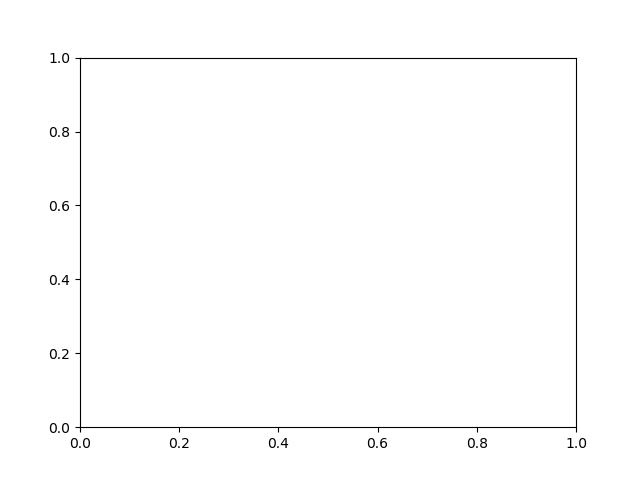

In [3]:
%matplotlib notebook

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def on_button_clicked(b): 
    fig = plt.figure()
    fig.set_dpi(100)
    ax1 = fig.add_subplot(1,1,1)

    #Diffusion constant
    k = 5

    #Scaling factor (for visualisation purposes)
    scale = 5

    #Length of the rod (0,L) on the x axis
    L = pi

    #Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
    x0 = np.linspace(0,L+1,10000)
    t0 = 0
    temp0 = 5  #Temperature of the rod at rest (before heating)

    #Increment
    dt = 0.01

    #Heat function
    def u(x,t):
        return temp0 + scale*np.exp(-k*t)*np.sin(x)

    #Gradient of u
    def grad_u(x,t):
                                   #du/dx              #du/dt
        return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

    a = []
    t = []

    for i in range(500):
        value = u(x0,t0) + grad_u(x0,t0)[1]*dt
        t.append(t0)
        t0 = t0 + dt
        a.append(value)

    k = 0
    
    def animate(i):         #The plot shows the temperature evolving with time
        global k            #at each point x in the rod
        x = a[k]            #The ends of the rod are kept at temperature temp0
        k += 1              #The rod is heated in one spot, then it cools down
        ax1.clear()
        plt.plot(x0,x,color='red',label='Temperature at each x')
        plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
        plt.grid(True)
        plt.ylim([temp0-2,2.5*scale])
        plt.xlim([0,L])
        plt.title('Heat equation')
        plt.legend()
        print('abc')

    anim = animation.FuncAnimation(fig,animate,frames=100,interval=20, blit=True)
    plt.show()

button = widgets.Button(description="Run simulation")
button.on_click(on_button_clicked)
display(button)

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')